# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/creditcard.csv',delimiter=',')

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
x.isna().any().sum()

0

пропущенных значений нет

In [148]:
X = x.drop(columns=['Class'])
y = x['Class']

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

Логистическая регрессия

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([1, 0, 0, ..., 0, 0, 0])

In [9]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_log_reg

array([9.99999953e-01, 1.53382270e-04, 4.96261131e-04, ...,
       3.44582298e-03, 1.19970836e-04, 3.18526428e-04])

Константа

In [10]:
from collections import Counter
Counter(y_train)

Counter({0: 199008, 1: 356})

Случай мошенничества происходит во много раз чаще, чем не мошенничества, поэтому предскажем все нули

In [11]:
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # выберем K=5 например
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_knn

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy

In [13]:
from sklearn.metrics import accuracy_score

print("const:", accuracy_score(y_test, y_pred_const))
print("log reg:", accuracy_score(y_test, y_pred_log_reg))
print("knn", accuracy_score(y_test, y_pred_knn))

const: 0.9984082955888721
log reg: 0.9992392589211521
knn 0.9984785178423042


Precision / Recall

In [14]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, y_pred_const))
print(recall_score(y_test, y_pred_const))

0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(precision_score(y_test, y_pred_log_reg))
print(recall_score(y_test, y_pred_log_reg))

0.8514851485148515
0.6323529411764706


In [16]:
print(precision_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

1.0
0.04411764705882353


Получается предсказываем точно, но находим далеко не всё

f1

In [17]:
from sklearn.metrics import f1_score

print("const:", f1_score(y_test, y_pred_const))
print("log reg:", f1_score(y_test, y_pred_log_reg))
print("knn", f1_score(y_test, y_pred_knn))

const: 0.0
log reg: 0.7257383966244726
knn 0.08450704225352113


Roc_auc

In [18]:
from sklearn.metrics import roc_auc_score

print("const:", roc_auc_score(y_test, y_pred_proba_const))
print("log reg:", roc_auc_score(y_test, y_pred_proba_log_reg))
print("knn", roc_auc_score(y_test, y_pred_proba_knn))

const: 0.5
log reg: 0.9584483446982834
knn 0.6163120449394196


 ROC-кривая

In [19]:
from matplotlib import pyplot as plt

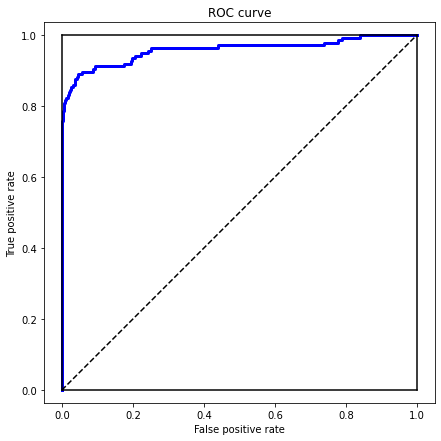

In [20]:
from matplotlib import pyplot as plt 
from sklearn.metrics import roc_curve

plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Будем максимизировать recall, так как нам важнее обнаружить все случаи мошенничества

In [21]:
print("cost:", recall_score(y_test, y_pred_const))
print("log reg:", recall_score(y_test, y_pred_log_reg))
print("knn", recall_score(y_test, y_pred_knn))

cost: 0.0
log reg: 0.6323529411764706
knn 0.04411764705882353


В дальнейшем константу нет смысла использвать, так как у неё нулевая точность

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [150]:
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

**Логистическая регрессия**

In [23]:
from sklearn.model_selection import GridSearchCV

grid = {'C': list(map(lambda i: 10 ** i, range(-5, 6))), 
        'penalty': ['elasticnet', 'l1', 'l2'], # l1 lasso l2 ridge
        "solver": ['liblinear', 'saga']}
log_reg = LogisticRegression(class_weight='balanced')
log_reg_cv = GridSearchCV(log_reg, grid, cv=cv, scoring="recall")
log_reg_cv.fit(X_train,y_train)

print("best parameters: ", log_reg_cv.best_params_)
print("recall :", log_reg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

best parameters:  {'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear'}
recall : 0.9484119915705593


In [24]:
def log_reg(X, y):
  scores = {}

  for i in range(-5, 6):
    c = 10.0 ** i
    print('С=', c)
    clf = LogisticRegression(penalty="l1", solver='liblinear', class_weight='balanced', C=c, random_state=42)

    start_time = datetime.datetime.now()
    score = cross_val_score(clf, X, y, cv=cv, scoring="recall", n_jobs=-1).mean()
    print('Score:', score)
    print('Time elapsed:', datetime.datetime.now() - start_time)

    scores[i] = score
    print()
  
  return scores

def find_best_c(scores):
  scores = pd.Series(scores)
  best_c = 10.0 ** (scores.sort_values(ascending=False).head(1)).index[0]
  best_score = (scores.sort_values(ascending=False).head(1)).values[0]
  print('Лучший параметр регуляризации равен С =', best_c, ', при котором качество равно', best_score)

С= 1e-05
Score: 0.9484119915705593
Time elapsed: 0:00:03.456705

С= 0.0001
Score: 0.8776987901732148
Time elapsed: 0:00:01.919652

С= 0.001
Score: 0.8894713654240508
Time elapsed: 0:00:03.070656

С= 0.01
Score: 0.8981921676742648
Time elapsed: 0:00:12.972385

С= 0.1
Score: 0.9011333441448531
Time elapsed: 0:01:16.386615

С= 1.0
Score: 0.8982347934202155
Time elapsed: 0:02:23.929336

С= 10.0
Score: 0.8982347934202155
Time elapsed: 0:02:48.514213

С= 100.0
Score: 0.8982347934202155
Time elapsed: 0:02:44.140036

С= 1000.0
Score: 0.8982347934202155
Time elapsed: 0:02:44.455454

С= 10000.0
Score: 0.8982347934202155
Time elapsed: 0:02:43.429830

С= 100000.0
Score: 0.8982347934202155
Time elapsed: 0:02:42.155711



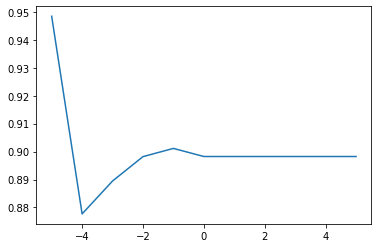


Лучший параметр регуляризации равен С = 1e-05 , при котором качество равно 0.9484119915705593


In [25]:
scores = log_reg(X_train, y_train)
pd.Series(scores).plot()
plt.show()
print()
find_best_c(scores)

In [36]:
clf = LogisticRegression(penalty="l1", solver='liblinear', class_weight='balanced', C=0.00001, random_state=42)
clf.fit(X_train, y_train)

score = cross_val_score(clf, X_train, y_train, cv=cv, scoring="recall", n_jobs=-1).mean()
print('Score:', score)

Score: 0.9484119915705593


In [37]:
clf.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.18098634,
         0.        ,  0.        , -0.01716205,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [41]:
y_pred_log_reg = clf.predict(X_test)

print(recall_score(y_test, y_pred_log_reg))

0.9705882352941176


Неплохо даже не смотря на то, что почти все коэффициенты занулились

In [43]:
# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(clf.intercept_))
for column, coef in zip(X_train.columns, clf.coef_[0]):
  print("Коэффициент для {} = {}".format(column, coef))

Сдвиг=[0.]
Коэффициент для Time = 0.0
Коэффициент для V1 = 0.0
Коэффициент для V2 = 0.0
Коэффициент для V3 = 0.0
Коэффициент для V4 = 0.0
Коэффициент для V5 = 0.0
Коэффициент для V6 = 0.0
Коэффициент для V7 = 0.0
Коэффициент для V8 = 0.0
Коэффициент для V9 = 0.0
Коэффициент для V10 = 0.0
Коэффициент для V11 = 0.0
Коэффициент для V12 = 0.0
Коэффициент для V13 = 0.0
Коэффициент для V14 = -0.18098633759666907
Коэффициент для V15 = 0.0
Коэффициент для V16 = 0.0
Коэффициент для V17 = -0.017162053649927327
Коэффициент для V18 = 0.0
Коэффициент для V19 = 0.0
Коэффициент для V20 = 0.0
Коэффициент для V21 = 0.0
Коэффициент для V22 = 0.0
Коэффициент для V23 = 0.0
Коэффициент для V24 = 0.0
Коэффициент для V25 = 0.0
Коэффициент для V26 = 0.0
Коэффициент для V27 = 0.0
Коэффициент для V28 = 0.0
Коэффициент для Amount = 0.0


Уберём ненужные признаки

In [151]:
X_train_new = X_train[['V14', 'V17']]
X_test_new = X_test[['V14', 'V17']]
X_train_new.head()

,V14,V17
2557,-0.222905,-0.351748
247823,1.120316,0.085319
152342,0.144737,1.139609
103385,0.108238,-0.051748
8771,1.639859,-0.457991


**KNN**

In [76]:
grid_knn = {'n_neighbors': list(map(lambda i: i, range(1, 11))), 
        'weights': ['uniform', 'distance'], 
        'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid_knn, cv=cv, scoring="recall")
knn_cv.fit(X_train_new,y_train)

print("best parameters: ", knn_cv.best_params_)
print("recall :", knn_cv.best_score_)

best parameters:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
recall : 0.7042237328810218


In [78]:
def knn(X, y):
  scores = {}

  for k in range(1, 11):
    print('k=', k)
    clf = KNeighborsClassifier(metric = 'euclidean', weights = 'distance', n_neighbors = k)

    start_time = datetime.datetime.now()
    score = cross_val_score(clf, X, y, cv=cv, scoring="recall", n_jobs=-1).mean()
    print('Score:', score)
    print('Time elapsed:', datetime.datetime.now() - start_time)

    scores[k] = score
    print()
  
  return scores

def find_best_k(scores):
  scores = pd.Series(scores)
  best_k = (scores.sort_values(ascending=False).head(1)).index[0]
  best_score = (scores.sort_values(ascending=False).head(1)).values[0]
  print('Лучшее количество соседей равно k =', best_k, ', при котором качество равно', best_score)

k= 1
Score: 0.6927002523869532
Time elapsed: 0:00:01.963049

k= 2
Score: 0.6927002523869532
Time elapsed: 0:00:01.035586

k= 3
Score: 0.6742968834464997
Time elapsed: 0:00:01.146565

k= 4
Score: 0.6862478310496212
Time elapsed: 0:00:01.135944

k= 5
Score: 0.7011468098040987
Time elapsed: 0:00:01.190460

k= 6
Score: 0.6982482590794612
Time elapsed: 0:00:01.214934

k= 7
Score: 0.7042237328810218
Time elapsed: 0:00:01.148456

k= 8
Score: 0.7017237328810217
Time elapsed: 0:00:01.192258

k= 9
Score: 0.7042237328810218
Time elapsed: 0:00:01.217513

k= 10
Score: 0.7015278848590869
Time elapsed: 0:00:01.377308



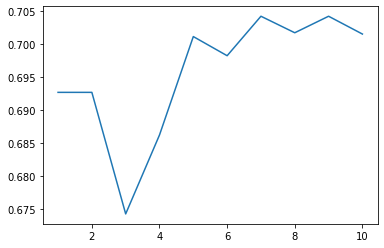


Лучшее количество соседей равно k = 7 , при котором качество равно 0.7042237328810218


In [79]:
scores = knn(X_train_new, y_train)
pd.Series(scores).plot()
plt.show()
print()
find_best_k(scores)

**Посмотрим на другие модели**

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

dt_cv = DecisionTreeClassifier()
svc_cv = SVC()
nb_cv = BernoulliNB()

cv_dict = {0: 'Дерево решений', 1: 'Метод опорных векторов', 2: 'Наивный байесовский классификатор'}
cv_models = [dt_cv, svc_cv, nb_cv]

for i, model in enumerate(cv_models):
  print("{} | Тестовая точность измерений: {}".format(cv_dict[i], cross_val_score(model, X_train_new, y_train, cv = cv, scoring="recall", n_jobs=-1).mean()))

Дерево решений | Тестовая точность измерений: 0.6778264237087767
Метод опорных векторов | Тестовая точность измерений: 0.693996699827902
Наивный байесовский классификатор | Тестовая точность измерений: 0.0


Лучшей моделью осталась Логистическая регрессия с параметрами: {'C': 1e-05, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': 'balanced'}

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [88]:
#https://drive.google.com/file/d/1EScCDamqreaPZFllRLp1wUCg3z93Gwmi/view?usp=sharing
! gdown --id 1EScCDamqreaPZFllRLp1wUCg3z93Gwmi

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EScCDamqreaPZFllRLp1wUCg3z93Gwmi
To: /content/yeast.csv
100% 60.1k/60.1k [00:00<00:00, 55.2MB/s]


In [153]:
data = pd.read_csv('yeast.csv',delimiter=',')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [97]:
data.isna().any().sum()

0

Пропущенных значений нет

Датасет: **Локализация дрожжевого белка**

Белки из дрожжей классифицируются на 10 классов:

* цитоплазматический, включая цитоскелетный (CYT);

* ядерный (NUC);

* вакуолярный (VAC);

* митохондриальный (MIT);

* изомальт (POX);

* внеклеточные, в том числе локализованные на клеточной стенке (EXC);

* белки, локализованные в просвете эндоплазматического ретикулума (ER);

* мембранные белки с расщепленным сигналом (ME1);

* мембранные белки с нерасщепленным сигналом (ME2);

* и мембранные белки без N-концевого знака (ME3), где белки ME1, ME2 и ME3 могут быть локализованы на плазматической мембране, мембране эндоплазматического ретикулума или мембране тельца Гольджи.

In [98]:
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [99]:
data_trial = data.copy()
data_trial['nuc'] = 'Nuc'
nuc = data_trial.truncate(before = -1, after = 15)

data_trial.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,Nuc,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,Nuc,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,Nuc,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,Nuc,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,Nuc,MIT


In [100]:
import networkx as nx

nuc = nx.from_pandas_edgelist(nuc, source = 'nuc', target = "name", edge_attr = True)

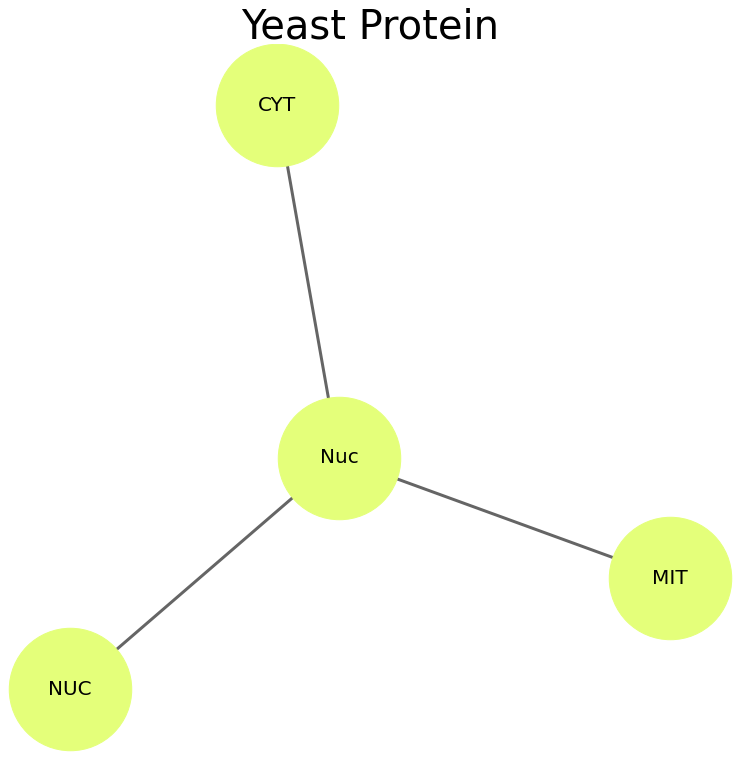

In [108]:
plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(nuc)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(nuc, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(nuc, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(nuc, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Yeast Protein', fontsize = 40)
plt.show()

In [105]:
data_trial['mit'] = 'Mit'
mit = data_trial.truncate(before = -1, after = 15)
mit = nx.from_pandas_edgelist(mit, source = 'mit', target = "mcg", edge_attr = True)

data_trial.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,Mit,0.5,0.0,0.48,Nuc,MIT
1,0.43,0.67,0.48,Mit,0.5,0.0,0.53,Nuc,MIT
2,0.64,0.62,0.49,Mit,0.5,0.0,0.53,Nuc,MIT
3,0.58,0.44,0.57,Mit,0.5,0.0,0.54,Nuc,NUC
4,0.42,0.44,0.48,Mit,0.5,0.0,0.48,Nuc,MIT


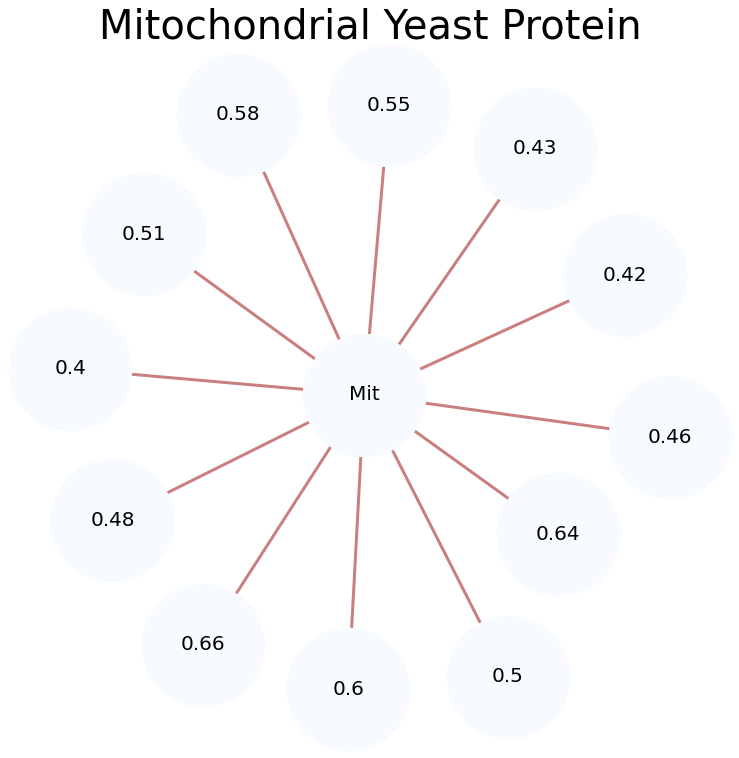

In [107]:
plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(mit)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(mit, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(mit, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(mit, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Mitochondrial Yeast Protein', fontsize = 40)
plt.show()

In [109]:
data_trial['vac'] = 'Vac'
vac = data_trial.truncate(before = -1, after = 10)
vac = nx.from_pandas_edgelist(vac, source = 'vac', target = "alm", edge_attr = True)

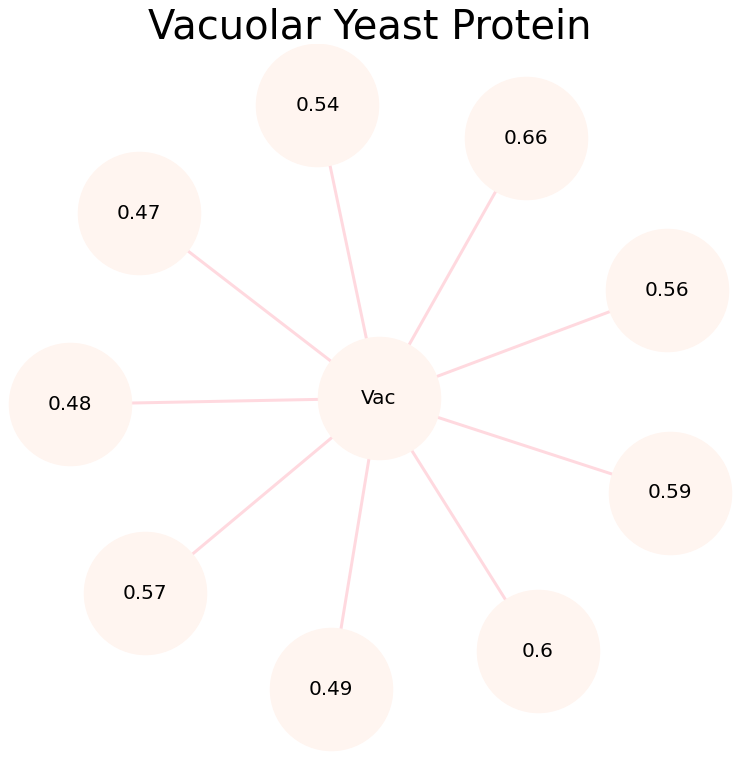

In [110]:
plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(vac)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(vac, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(vac, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(vac, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Vacuolar Yeast Protein', fontsize = 40)
plt.show()

In [112]:
Counter(data['name'])

Counter({'CYT': 463,
         'ERL': 5,
         'EXC': 35,
         'ME1': 44,
         'ME2': 51,
         'ME3': 163,
         'MIT': 244,
         'NUC': 429,
         'POX': 20,
         'VAC': 30})

In [154]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])

label_encoder.classes_

array(['CYT', 'ERL', 'EXC', 'ME1', 'ME2', 'ME3', 'MIT', 'NUC', 'POX',
       'VAC'], dtype=object)

Перекодировали целевую переменную в:

* 'CYT' - 0
* 'ERL' - 1
* 'EXC' - 2
* 'ME1' - 3
* 'ME2' - 4
* 'ME3' - 5
* 'MIT' - 6
* 'NUC' - 7
* 'POX' - 8
* 'VAC' - 9

In [155]:
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [156]:
X = data.drop(columns=['name'])
y = data['name']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

Логистическая ргерессия

In [117]:
log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([6, 6, 0, 0, 5, 6, 0, 0, 0, 5, 5, 6, 7, 0, 7, 7, 0, 7, 5, 0, 7, 7,
       5, 7, 6, 0, 6, 7, 0, 5, 0, 0, 5, 7, 0, 0, 8, 0, 7, 6, 0, 5, 0, 0,
       0, 6, 7, 7, 0, 7, 7, 0, 5, 0, 7, 0, 0, 6, 0, 5, 7, 7, 0, 3, 7, 0,
       6, 0, 0, 0, 0, 0, 6, 0, 3, 0, 6, 0, 0, 6, 0, 0, 6, 6, 7, 6, 7, 6,
       6, 0, 0, 0, 6, 0, 5, 0, 7, 6, 0, 7, 0, 0, 5, 0, 5, 0, 6, 6, 0, 7,
       7, 7, 0, 7, 7, 7, 0, 7, 6, 7, 6, 0, 6, 5, 7, 6, 0, 0, 0, 6, 0, 0,
       0, 7, 5, 5, 0, 0, 7, 0, 0, 0, 0, 7, 7, 7, 7, 0, 0, 0, 5, 0, 7, 7,
       0, 5, 0, 7, 5, 0, 4, 7, 7, 0, 0, 7, 3, 0, 6, 0, 0, 7, 7, 7, 0, 7,
       0, 0, 0, 0, 7, 7, 0, 7, 7, 0, 3, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 7,
       7, 0, 0, 6, 7, 7, 6, 6, 5, 6, 0, 0, 0, 7, 6, 7, 0, 7, 6, 7, 0, 0,
       0, 0, 7, 7, 8, 7, 6, 6, 7, 0, 0, 6, 6, 5, 7, 7, 6, 0, 7, 7, 7, 7,
       5, 0, 0, 7, 7, 7, 5, 7, 0, 0, 5, 0, 7, 7, 6, 7, 6, 0, 0, 7, 0, 0,
       7, 0, 0, 6, 0, 0, 0, 7, 6, 0, 6, 4, 0, 6, 7, 6, 7, 0, 0, 7, 0, 3,
       0, 7, 7, 5, 5, 0, 0, 0, 0, 7, 0, 0, 0, 7, 6,

In [118]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_pred_proba_log_reg[0]

array([0.20564869, 0.00750601, 0.03628175, 0.04309605, 0.05493598,
       0.06475012, 0.37140463, 0.17792249, 0.01664161, 0.02181267])

Константа

In [120]:
from collections import Counter
Counter(y_train)

Counter({0: 318,
         1: 5,
         2: 25,
         3: 29,
         4: 40,
         5: 112,
         6: 170,
         7: 303,
         8: 16,
         9: 20})

Самый частый класс это 0, поэтому константная модель будет состоять из нулей

In [123]:
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

knn

In [124]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0. , 0. , ..., 0.6, 0. , 0. ],
       ...,
       [0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.6, 0. , 0. ]])

In [125]:
print(accuracy_score(y_test, y_pred_log_reg))
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_const))

0.5627802690582959
0.57847533632287
0.3251121076233184


In [135]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(precision_score(y_test, y_pred_knn, average='macro'))
print(precision_score(y_test, y_pred_const, average='macro'))
print()
print(precision_score(y_test, y_pred_log_reg, average='micro'))
print(precision_score(y_test, y_pred_knn, average='micro'))
print(precision_score(y_test, y_pred_const, average='micro'))

0.5183550740924505
0.5650252030865567
0.03612356751370204

0.5627802690582959
0.57847533632287
0.3251121076233184


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))
print(recall_score(y_test, y_pred_const, average='macro'))
print()
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))
print(recall_score(y_test, y_pred_const, average='micro'))

0.4279215479012639
0.5294065607453032
0.1111111111111111

0.5627802690582959
0.57847533632287
0.3251121076233184


In [134]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))
print()
print(f1_score(y_test, y_pred_log_reg, average='micro'))
print(f1_score(y_test, y_pred_knn, average='micro'))
print(f1_score(y_test, y_pred_const, average='micro'))

0.4592727589246317
0.5432135379280999
0.5432135379280999

0.5627802690582959
0.57847533632287
0.3251121076233184


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Будем максимизировать метрику f1 'micro', так как нам важно и точно предсказывать классы локализации белка и находить их все

In [158]:
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

**Логистическая регрессия**

In [165]:
grid = {'C': list(map(lambda i: 10 ** i, range(-5, 7))), 
        'penalty': ['l1', 'l2'], # l1 lasso l2 ridge
        "solver": ['liblinear', 'saga']}
log_reg = LogisticRegression(max_iter = 10000)
log_reg_cv = GridSearchCV(log_reg, grid, cv=cv, scoring="f1_micro")
log_reg_cv.fit(X_train,y_train)

print("best parameters: ", log_reg_cv.best_params_)
print("f1_micro:", log_reg_cv.best_score_)

best parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
f1_micro: 0.5799656261612783


Метрика логистической регресии не сильно улучшилась

**Knn**

In [166]:
grid_knn = {'n_neighbors': list(map(lambda i: i, range(1, 11))), 
            'weights': ['uniform', 'distance'], 
            'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid_knn, cv=cv, scoring="f1_micro")
knn_cv.fit(X_train,y_train)

print("best parameters: ", knn_cv.best_params_)
print("f1_micro:", knn_cv.best_score_)

best parameters:  {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
f1_micro: 0.5905657748049051


**Случайный лес**

In [161]:
from sklearn.ensemble import RandomForestClassifier

param = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param, cv=cv, scoring="f1_micro")
rf_cv.fit(X_train,y_train)

print("best parameters: ", rf_cv.best_params_)
print("f1_micro:", rf_cv.best_score_)

best parameters:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
f1_micro: 0.6262216648086214


Получилась самая неплохая модель

In [162]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
 

def get_models():
	models = dict()
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_depth = 11, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 40, max_features=i)
	return models
 

def evaluate_model(model, X, y):
	scores = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
	return scores

In [163]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.607 (0.019)
>2 0.611 (0.020)
>3 0.624 (0.022)
>4 0.610 (0.024)
>5 0.611 (0.019)
>6 0.600 (0.023)
>7 0.600 (0.026)


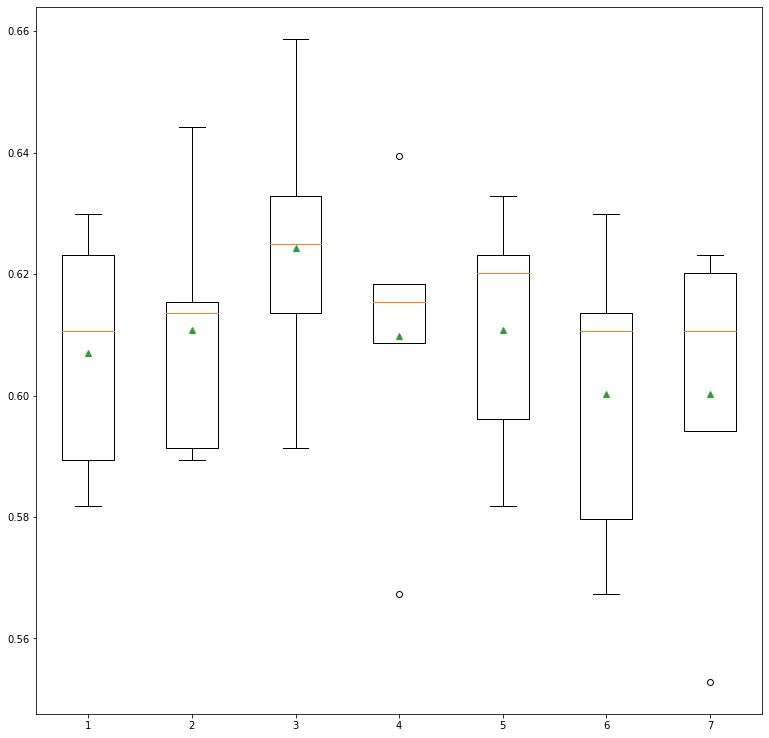

In [164]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

**Посмотрим на другие модели**

In [160]:
dt_cv = DecisionTreeClassifier()
svc_cv = SVC()
nb_cv = BernoulliNB()

cv_dict = {0: 'Дерево решений', 1: 'Метод опорных векторов', 2: 'Наивный байесовский классификатор'}
cv_models = [dt_cv, svc_cv, nb_cv]

for i, model in enumerate(cv_models):
  print("{} | Тестовая точность измерений: {}".format(cv_dict[i], cross_val_score(model, X_train, y_train, cv = cv, scoring="f1_micro", n_jobs=-1).mean()))

Дерево решений | Тестовая точность измерений: 0.5278753251579338
Метод опорных векторов | Тестовая точность измерений: 0.5828548866592345
Наивный байесовский классификатор | Тестовая точность измерений: 0.4624442586399108


Они чуть хуже, поэтому не будем их рассматривать